## Задание 2

- решите задачу классификации на ваших данных с использованием рассмотренных моделей sklearn: knn, NB, Logistic Regression, SVM. Не забудьте подобрать гиперпараметры.
- вычислите значения метрик Accuracy, Precision, Recall, F1, ROC AUC score


# Импорт

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve


# Загружаем датасет и разбиваем её на выборку.

In [2]:
models = pd.read_csv('../../Data/neo_task_moded_norm.csv')
X_train, X_test, y_train, y_test = train_test_split(models.drop('hazardous', axis=1), models['hazardous'], test_size=0.25, random_state=42)


# Подбираем гиппер-параметры.

In [3]:
logistic_regression_optimal_n_neighbors = RandomizedSearchCV(LogisticRegression(),
                                                             {'penalty': ['l1', 'l2', 'elasticnet', None],
                                                               'dual': [True, False],
                                                               'C': np.arange(0, 2, 0.1),
                                                               'tol': np.arange(0, 1e-4, 1e-5),
                                                               'l1_ratio': np.arange(0, 1, 0.1),
                                                               'warm_start': [True, False],
                                                               'multi_class': ['auto', 'ovr', 'multinomial'],
                                                               'solver': ['liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
                                                              },
                                                              n_iter=10,
                                                              n_jobs=-1,
                                                              scoring='accuracy',
                                                              random_state=71
                                                              ).fit(X_train, y_train)
logistic_regression_optimal_n_neighbors.best_params_

c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.89991717        nan
 0.90280852        nan 0.8981402         nan]
  warnings.warn(
c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'warm_start': True,
 'tol': 1e-05,
 'solver': 'saga',
 'penalty': 'l1',
 'multi_class': 'multinomial',
 'l1_ratio': 0.8,
 'dual': False,
 'C': 1.5}

In [19]:
# logistic_regression_optimal_n_neighbors = GridSearchCV(LogisticRegression(), 
#                                                         {
#                                                         'penalty': ['l1', 'l2', 'elasticnet', None],
#                                                         #  'dual': [True, False],
#                                                         #  'l1_ratio': np.arange(0, 1, 0.1),
#                                                         'solver': ['liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
#                                                          }, 
#                                                          scoring=accuracy_score
#                                                          ).fit(X_train, y_train)
# logistic_regression_optimal_n_neighbors.best_params_

c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass normalize=68844    0.0
10324    0.0
76291    0.0
866      1.0
41996    1.0
        ... 
51277    1.0
66955    1.0
36938    1.0
3817     1.0
38004    1.0
Name: hazardous, Length: 13626, dtype: float64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent

{'penalty': 'l1', 'solver': 'liblinear'}

# Формула Байеса

In [4]:
lr = LogisticRegression(
    solver=logistic_regression_optimal_n_neighbors.best_params_['solver'] if 'solver' in logistic_regression_optimal_n_neighbors.best_params_ else 'lbfgs',
    penalty=logistic_regression_optimal_n_neighbors.best_params_['penalty'] if 'penalty' in logistic_regression_optimal_n_neighbors.best_params_ else 'l2',
    dual=logistic_regression_optimal_n_neighbors.best_params_['dual'] if 'dual' in logistic_regression_optimal_n_neighbors.best_params_ else False,
    tol=logistic_regression_optimal_n_neighbors.best_params_['tol'] if 'tol' in logistic_regression_optimal_n_neighbors.best_params_ else 1e-4,
    C=logistic_regression_optimal_n_neighbors.best_params_['C'] if 'C' in logistic_regression_optimal_n_neighbors.best_params_ else 1,
    multi_class=logistic_regression_optimal_n_neighbors.best_params_['multi_class'] if 'multi_class' in logistic_regression_optimal_n_neighbors.best_params_ else 'auto',
    warm_start=logistic_regression_optimal_n_neighbors.best_params_['warm_start'] if 'warm_start' in logistic_regression_optimal_n_neighbors.best_params_ else False,
)
lr.fit(X_train, y_train)
y_predicted_by_logistic_regression = lr.predict(X_test)

c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


# Оценка качества 

In [5]:
print('Accuracy')
print(accuracy_score(y_test, y_predicted_by_logistic_regression))

Accuracy
0.9006550711542806


In [6]:
print('Confusion matrix')
print(confusion_matrix(y_test, y_predicted_by_logistic_regression))

Confusion matrix
[[19778   171]
 [ 2028   158]]


In [7]:
print('Precision, Recall, F\n', classification_report(y_test, y_predicted_by_logistic_regression))

Precision, Recall, F
               precision    recall  f1-score   support

       False       0.91      0.99      0.95     19949
        True       0.48      0.07      0.13      2186

    accuracy                           0.90     22135
   macro avg       0.69      0.53      0.54     22135
weighted avg       0.86      0.90      0.87     22135



ROC AUC score


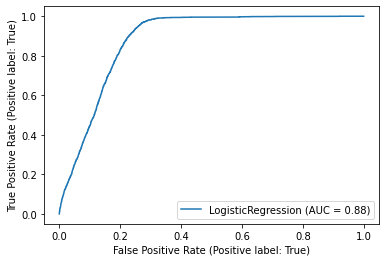

In [8]:
print('ROC AUC score') 
plot_roc_curve(lr, X_test, y_test)